### Setup and Imports

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)


DATA_PATH = '../data/raw/health'

files = [f for f in os.listdir(DATA_PATH) if f.endswith('.csv')]
print("CSV files in the data directory:", files)

CSV files in the data directory: ['access-drinking-water-stacked.csv', 'child-mortality.csv', 'infant-mortality.csv', 'life-expectancy.csv', 'mortality-from-ncds-sdgs.csv', 'ncd mortality rate.csv', 'share-of-adults-defined-as-obese.csv', 'share-of-out-of-pocket-expenditure-vs-gdp-per-capita.csv']


In [7]:
#helper function to summarize datasets
def summarize_dataset(file_path):
    """Return basic info for each CSV file."""
    df = pd.read_csv(file_path)
    cols = list(df.columns)
    n_rows, n_cols = df.shape

    year_min = int(df['Year'].min()) if 'Year' in df.columns else np.nan
    year_max = int(df['Year'].max()) if 'Year' in df.columns else np.nan
    na_percent = df.isna().mean().mean() * 100

    return {
        'file_name': os.path.basename(file_path),
        'rows': n_rows,
        'cols': n_cols,
        'columns': ", ".join(cols[:6]) + ("..." if len(cols) > 6 else ""),
        'year_min': year_min,
        'year_max': year_max,
        'missing_%': round(na_percent, 2)
    }


In [8]:
summary = []
for f in files:
    fp = os.path.join(DATA_PATH, f)
    summary.append(summarize_dataset(fp))

schema_df = pd.DataFrame(summary)
schema_df


,file_name,rows,cols,columns,year_min,year_max,missing_%
0,access-drinking-water-stacked.csv,5622,8,"Entity, Code, Year, Share of the population us...",2000.0,2022.0,9.51
1,child-mortality.csv,16835,4,"Entity, Code, Year, Child mortality rate",1751.0,2023.0,0.92
2,infant-mortality.csv,13577,4,"Entity, Code, Year, Infant mortality rate of b...",1932.0,2023.0,1.06
3,life-expectancy.csv,21565,4,"Entity, Code, Year, Period life expectancy at ...",1543.0,2023.0,2.27
4,mortality-from-ncds-sdgs.csv,4356,4,"Entity, Code, Year, Mortality from CVD, cancer...",2000.0,2021.0,1.52
5,ncd mortality rate.csv,4070,34,"IndicatorCode, Indicator, ValueType, ParentLoc...",NaN,NaN,41.01
6,share-of-adults-defined-as-obese.csv,6798,4,"Entity, Code, Year, Prevalence of obesity amon...",1990.0,2022.0,0.73
7,share-of-out-of-pocket-expenditure-vs-gdp-per-...,59294,7,"Entity, Code, Year, Out-of-pocket expenditure ...",-10000.0,2024.0,40.95


In [9]:
schema_df['variable_name'] = [
    'water_access_pct',
    'child_mortality_per_1000',
    'infant_mortality_per_1000',
    'life_expectancy_years',
    'ncd_mortality_sdg_per_100k',
    'ncd_mortality_per_100k',
    'obesity_share_adults_pct',
    'oop_share_health_exp_pct'
]

schema_df['unit'] = [
    '% population',
    'deaths per 1,000 live births',
    'deaths per 1,000 live births',
    'years',
    'deaths per 100,000',
    'deaths per 100,000',
    '% adults',
    '% of total health expenditure'
]

schema_df['higher_is_better'] = [True, False, False, True, False, False, False, False]
schema_df


,file_name,rows,cols,columns,year_min,year_max,missing_%,variable_name,unit,higher_is_better
0,access-drinking-water-stacked.csv,5622,8,"Entity, Code, Year, Share of the population us...",2000.0,2022.0,9.51,water_access_pct,% population,True
1,child-mortality.csv,16835,4,"Entity, Code, Year, Child mortality rate",1751.0,2023.0,0.92,child_mortality_per_1000,"deaths per 1,000 live births",False
2,infant-mortality.csv,13577,4,"Entity, Code, Year, Infant mortality rate of b...",1932.0,2023.0,1.06,infant_mortality_per_1000,"deaths per 1,000 live births",False
3,life-expectancy.csv,21565,4,"Entity, Code, Year, Period life expectancy at ...",1543.0,2023.0,2.27,life_expectancy_years,years,True
4,mortality-from-ncds-sdgs.csv,4356,4,"Entity, Code, Year, Mortality from CVD, cancer...",2000.0,2021.0,1.52,ncd_mortality_sdg_per_100k,"deaths per 100,000",False
5,ncd mortality rate.csv,4070,34,"IndicatorCode, Indicator, ValueType, ParentLoc...",NaN,NaN,41.01,ncd_mortality_per_100k,"deaths per 100,000",False
6,share-of-adults-defined-as-obese.csv,6798,4,"Entity, Code, Year, Prevalence of obesity amon...",1990.0,2022.0,0.73,obesity_share_adults_pct,% adults,False
7,share-of-out-of-pocket-expenditure-vs-gdp-per-...,59294,7,"Entity, Code, Year, Out-of-pocket expenditure ...",-10000.0,2024.0,40.95,oop_share_health_exp_pct,% of total health expenditure,False


In [10]:
OUTPUT_PATH = "../data/interim/"
os.makedirs(OUTPUT_PATH, exist_ok=True)

schema_df.to_csv(os.path.join(OUTPUT_PATH, "health_schema_summary.csv"), index=False)
print("Saved as health_schema_summary.csv")


Saved as health_schema_summary.csv


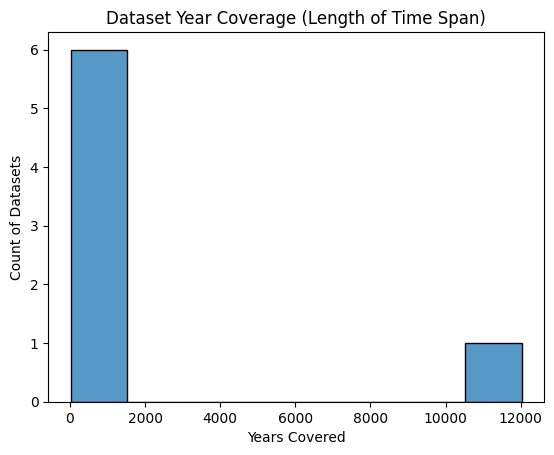

In [11]:
sns.histplot(schema_df['year_max'] - schema_df['year_min'], bins=8)
plt.title("Dataset Year Coverage (Length of Time Span)")
plt.xlabel("Years Covered")
plt.ylabel("Count of Datasets")
plt.show()
